# ResNet
paper : https://arxiv.org/ftp/arxiv/papers/1907/1907.01514.pdf

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import functions
from sklearn.base import BaseEstimator,TransformerMixin
from biosppy.signals import ecg
from scipy import fftpack

In [2]:
trainX = pd.read_csv("data/X_train.csv").drop(columns=["id"])
trainy = pd.read_csv("data/y_train.csv").drop(columns=["id"])
testX = pd.read_csv("data/X_test.csv").drop(columns=["id"])

In [46]:
trainy.head()

y
0  0
1  0
2  0
3  1
4  2

In [3]:
def removeNans(data):
    trainX_aug = []
    for i in tqdm.trange(0,len(data)):
        lastIdx = data.iloc[i].index.get_loc(data.iloc[i,:].last_valid_index())
        trainX_aug.append(data.iloc[i,0:lastIdx])
    trainX_aug = np.array(trainX_aug)
    return trainX_aug

In [4]:
new_trainX = removeNans(trainX)

100%|██████████████████████████████████████████████████████████████████████████████| 5117/5117 [05:06<00:00, 16.67it/s]
<ipython-input-3-6cf82b3ee46d>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainX_aug = np.array(trainX_aug)


In [5]:
signals = pd.DataFrame()
for i in tqdm.trange(0,len(new_trainX)):
    signals = signals.append({"ECG_BioSPPy" : nk.ecg_clean(new_trainX[i], sampling_rate=300, method="biosppy")},ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████| 5117/5117 [02:38<00:00, 32.29it/s]


In [6]:
signals.iloc[0][0]

array([ -2.69594661, -10.02420238, -20.26290595, ..., -11.40589445,
        -6.72712114,  -1.4743458 ])

C:\Users\atace\anaconda3\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 15000 is greater than input length  = 8359, using nperseg = 8359
  warnings.warn('nperseg = {0:d} is greater than input length '


[ 0.07177892  0.10766838  0.14355784  0.1794473   0.21533676  0.25122622
  0.28711568  0.32300514  0.3588946   0.39478407  0.43067353  0.46656299
  0.50245245  0.53834191  0.57423137  0.61012083  0.64601029  0.68189975
  0.71778921  0.75367867  0.78956813  0.82545759  0.86134705  0.89723651
  0.93312597  0.96901543  1.00490489  1.04079435  1.07668381  1.11257327
  1.14846273  1.1843522   1.22024166  1.25613112  1.29202058  1.32791004
  1.3637995   1.39968896  1.43557842  1.47146788  1.50735734  1.5432468
  1.57913626  1.61502572  1.65091518  1.68680464  1.7226941   1.75858356
  1.79447302  1.83036248  1.86625194  1.9021414   1.93803086  1.97392033
  2.00980979  2.04569925  2.08158871  2.11747817  2.15336763  2.18925709
  2.22514655  2.26103601  2.29692547  2.33281493  2.36870439  2.40459385
  2.44048331  2.47637277  2.51226223  2.54815169  2.58404115  2.61993061
  2.65582007  2.69170953  2.727599    2.76348846  2.79937792  2.83526738
  2.87115684  2.9070463   2.94293576  2.97882522  3.

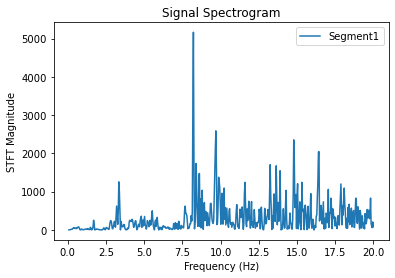

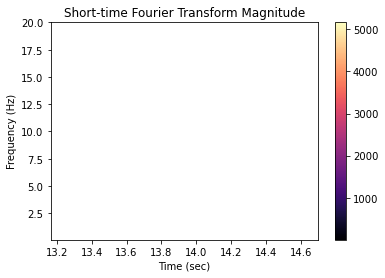

In [65]:
f, t, stft = nk.signal_timefrequency(signals.iloc[4,0], 300, max_frequency=20, method="stft", show=True)
#f, t, stft = nk.signal_timefrequency(signals.iloc[15,0], 300, max_frequency=20, method="stft", show=True)
#f, t, cwtm = nk.signal_timefrequency(signals.iloc[1,0], 300, max_frequency=20, method="cwt", show=True)
#f, t, wvd = nk.signal_timefrequency(signals.iloc[0,0], 300, max_frequency=20, method="wvd", show=True)
#f, t, pwvd = nk.signal_timefrequency(signals.iloc[5,0], 300, max_frequency=20, method="pwvd", show=True)
print(stft)